In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Data Preparation

In [3]:
# Define file paths
population_file_path = 'C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/data/raw/Population.csv'
stores_file_path = 'C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/data/raw/Stores.csv'

# Load the data
population_df = pd.read_csv(population_file_path)
stores_df = pd.read_csv(stores_file_path)

# Display the first few rows of each DataFrame
print("Population DataFrame:")
print(population_df.head())

print("\nStores DataFrame:")
print(stores_df.head())

# Check for missing values
print("\nMissing values in Population DataFrame:")
print(population_df.isnull().sum())

print("\nMissing values in Stores DataFrame:")
print(stores_df.isnull().sum())

# Display data types
print("\nData types in Population DataFrame:")
print(population_df.dtypes)

print("\nData types in Stores DataFrame:")
print(stores_df.dtypes)

Population DataFrame:
    Latitude  Longitude  Metric population
0  50.435976  30.625646               1.96
1  50.435185  30.626106               1.95
2  50.436381  30.626037               1.70
3  50.436153  30.626818               2.09
4  50.435430  30.626640               2.13

Stores DataFrame:
     Store   Latitude  Longitude  Metric Store
0  Store 1  50.415258  30.522344          2.18
1  Store 2  50.495292  30.512299          2.64
2  Store 3  50.414301  30.650869          2.50
3  Store 4  50.471703  30.478740          2.38
4  Store 5  50.532248  30.608288          2.34

Missing values in Population DataFrame:
Latitude             0
Longitude            0
Metric population    0
dtype: int64

Missing values in Stores DataFrame:
Store           0
Latitude        0
Longitude       0
Metric Store    0
dtype: int64

Data types in Population DataFrame:
Latitude             float64
Longitude            float64
Metric population    float64
dtype: object

Data types in Stores DataFrame:
Sto

In [4]:
# Extract the Store Id from the Store column
stores_df['Store Id'] = stores_df['Store'].apply(lambda x: x.split(' ')[1])

# Display the first few rows to ensure the Store Id column is added correctly
print(stores_df.head(12))

       Store   Latitude  Longitude  Metric Store Store Id
0    Store 1  50.415258  30.522344          2.18        1
1    Store 2  50.495292  30.512299          2.64        2
2    Store 3  50.414301  30.650869          2.50        3
3    Store 4  50.471703  30.478740          2.38        4
4    Store 5  50.532248  30.608288          2.34        5
5    Store 6  50.441108  30.520819          2.16        6
6    Store 7  50.518478  30.458280          2.41        7
7    Store 8  50.495560  30.358346          2.37        8
8    Store 9  50.462101  30.481258          2.78        9
9   Store 10  50.445203  30.444036          2.63       10
10  Store 11  50.411143  30.404760          2.18       11
11  Store 12  50.407110  30.666180          2.58       12


In [5]:
# Add a building_id to the Population dataset
population_df['Building Id'] = range(1, len(population_df) + 1)

# Display the first few rows to verify
print("Population DataFrame with Building Id:")
print(population_df.head())

Population DataFrame with Building Id:
    Latitude  Longitude  Metric population  Building Id
0  50.435976  30.625646               1.96            1
1  50.435185  30.626106               1.95            2
2  50.436381  30.626037               1.70            3
3  50.436153  30.626818               2.09            4
4  50.435430  30.626640               2.13            5


# Distance Calculation

In [6]:
# Extract coordinates
population_coords = population_df[['Latitude', 'Longitude']].values
stores_coords = stores_df[['Latitude', 'Longitude']].values

# Define Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate distances
distances = []
for i, pop_coord in enumerate(population_coords):
    for j, store_coord in enumerate(stores_coords):
        dist = haversine(pop_coord[0], pop_coord[1], store_coord[0], store_coord[1])
        distances.append({
            'Building Id': population_df.iloc[i]['Building Id'],
            'Store': stores_df.iloc[j]['Store'],
            'Distance (km)': round(dist, 3)
        })

# Convert the list of distances to a DataFrame
distances_df = pd.DataFrame(distances)

# Display the first few rows of the distances DataFrame
print("Distances DataFrame:")
print(distances_df.head())

# Save the distances DataFrame
output_path = 'C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/data/processed/Building_Store_Distances.csv'
distances_df.to_csv(output_path, index=False)

# Output a success message
print(f"Export to {output_path} was successful.")

Distances DataFrame:
   Building Id    Store  Distance (km)
0          1.0  Store 1          7.672
1          1.0  Store 2         10.386
2          1.0  Store 3          3.000
3          1.0  Store 4         11.133
4          1.0  Store 5         10.775
Export to C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/data/processed/Building_Store_Distances.csv was successful.


In [7]:
# Check the result of the distance calculation using a specific example at https://www.calculator.net/distance-calculator.html
building_id = 1
store_name = 'Store 1'
specific_distance = distances_df[(distances_df['Building Id'] == building_id) & (distances_df['Store'] == store_name)].iloc[0]
building_coords = population_df.loc[population_df['Building Id'] == building_id, ['Latitude', 'Longitude']].values[0]
store_coords = stores_df.loc[stores_df['Store'] == store_name, ['Latitude', 'Longitude']].values[0]

distance_value = specific_distance['Distance (km)']
print(f"For example, the distance between Building {building_id} at coordinates ({building_coords[0]}, {building_coords[1]}) and Store '{store_name}' at coordinates ({store_coords[0]}, {store_coords[1]}) is {distance_value} kilometers.")

For example, the distance between Building 1 at coordinates (50.4359763, 30.62564575) and Store 'Store 1' at coordinates (50.415258, 30.522344) is 7.672 kilometers.


# Assign Buildings to Nearest Store

We assume that a single population unit (a building) belongs to one store only.

In [8]:
# Assign Buildings to the Nearest Store
nearest_stores = distances_df.loc[distances_df.groupby('Building Id')['Distance (km)'].idxmin()]

# Add the nearest store as a new column in the population_df
population_df = population_df.merge(nearest_stores[['Building Id', 'Store', 'Distance (km)']], on='Building Id', how='left')

# Rename the columns for clarity
population_df.rename(columns={'Store': 'Nearest Store', 'Distance (km)': 'Distance to Nearest Store (km)'}, inplace=True)

# Display the first few rows of the updated population_df
print("Updated Population DataFrame with Nearest Store:")
print(population_df.head())

Updated Population DataFrame with Nearest Store:
    Latitude  Longitude  Metric population  Building Id Nearest Store  \
0  50.435976  30.625646               1.96            1      Store 84   
1  50.435185  30.626106               1.95            2      Store 84   
2  50.436381  30.626037               1.70            3      Store 84   
3  50.436153  30.626818               2.09            4      Store 84   
4  50.435430  30.626640               2.13            5      Store 84   

   Distance to Nearest Store (km)  
0                           1.372  
1                           1.286  
2                           1.385  
3                           1.329  
4                           1.279  


In [11]:
# Save the population DataFrame after the latest updates
population_output_path = 'C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/data/processed/Population_with_Nearest_Store.csv'
population_df.to_csv(population_output_path, index=False)

# Output a success message
print(f"Export to {population_output_path} was successful.")

Export to C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/data/processed/Population_with_Nearest_Store.csv was successful.


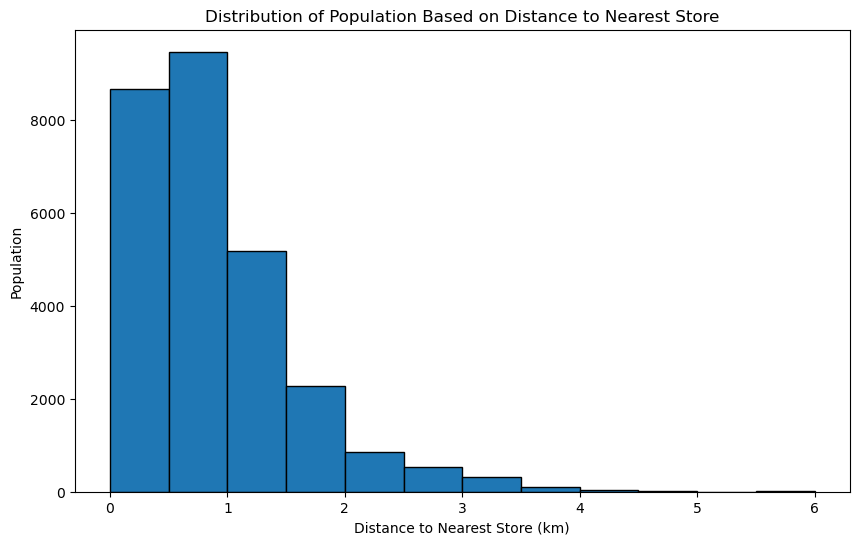

In [12]:
# Extract the relevant data for the histogram
distances = population_df['Distance to Nearest Store (km)']
population = population_df['Metric population']

# Create a weighted histogram based on the population
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=np.arange(0, distances.max() + 0.5, 0.5), weights=population, edgecolor='black')

# Add labels and title
plt.xlabel('Distance to Nearest Store (km)')
plt.ylabel('Population')
plt.title('Distribution of Population Based on Distance to Nearest Store')

# Show the plot
plt.show()

**Insights from the Histogram.** The first few bins (0 to 1.0 kilometers) contain the highest population, indicating that most buildings (and therefore, the population) are located close to stores. This suggests that **the majority of the population has good access to stores within an acceptable walking distance**.

Note: Walking distances can be translated into time for better understanding:
- 500 meters: Approximately a 6-7 minute walk.
- 1 kilometer: Approximately a 12-15 minute walk.
- 1.5 kilometers: Approximately an 18-22 minute walk.

# Aggregate Population by Store

Some buildings may be located too far from the stores to be realistically served by them. To accurately calculate the population served by each store, we can consider two approaches:

- ***Distance Threshold Approach***: Set a maximum distance beyond which a building is considered not to be served by any store.
- ***Weighted Population Approach***: Assign weights to buildings based on their distance to the nearest store, with closer buildings receiving higher weights and farther buildings receiving lower weights.

We will use the **Distance Threshold Approach** for its simplicity and ease of understanding.

### Determining the Distance Threshold

Selecting an appropriate distance threshold requires careful consideration. Ideally, this would involve analyzing customer data from the stores. However, based on existing research and our previously built histogram, we can make an informed assumption.

Kyiv is a densely populated urban area, particularly in its central and residential neighborhoods. In such areas, people generally prefer shorter walking distances for daily shopping. Research indicates that customers are comfortable walking up to *500 meters (0.5 kilometers)* for frequent grocery shopping. Most customers prefer not to walk more than 1,000 meters (1 kilometer).

Therefore, let's use **both 500 meters and 1 kilometer as our Distance Thresholds** to determine the population served by each store. It might be interesting to compare the results.

In [13]:
# Filter buildings within the 1 kilometer threshold
within_1km = population_df[population_df['Distance to Nearest Store (km)'] <= 1.0]

# Aggregate the population served by each store within 1 kilometer
population_served_1km = within_1km.groupby('Nearest Store')['Metric population'].sum().reset_index()
population_served_1km.rename(columns={'Metric population': 'Population Served within 1km'}, inplace=True)

# Filter buildings within the 500 meters threshold
within_500m = population_df[population_df['Distance to Nearest Store (km)'] <= 0.5]

# Aggregate the population served by each store within 500 meters
population_served_500m = within_500m.groupby('Nearest Store')['Metric population'].sum().reset_index()
population_served_500m.rename(columns={'Metric population': 'Population Served within 500m'}, inplace=True)

# Merge the results with stores_df, avoiding duplicate columns
stores_df = stores_df.merge(population_served_1km, left_on='Store', right_on='Nearest Store', how='left', suffixes=('', '_duplicate_1km'))
stores_df = stores_df.merge(population_served_500m, left_on='Store', right_on='Nearest Store', how='left', suffixes=('', '_duplicate_500m'))

# Drop duplicate columns if they exist
stores_df = stores_df.loc[:, ~stores_df.columns.str.contains('_duplicate')]

# Drop redundant 'Nearest Store' columns
stores_df.drop(columns=['Nearest Store'], inplace=True)

# Display the first few rows of the updated stores_df
print("Updated Stores DataFrame:")
print(stores_df.head())


Updated Stores DataFrame:
     Store   Latitude  Longitude  Metric Store Store Id  \
0  Store 1  50.415258  30.522344          2.18        1   
1  Store 2  50.495292  30.512299          2.64        2   
2  Store 3  50.414301  30.650869          2.50        3   
3  Store 4  50.471703  30.478740          2.38        4   
4  Store 5  50.532248  30.608288          2.34        5   

   Population Served within 1km  Population Served within 500m  
0                        107.01                          90.76  
1                        149.67                         112.25  
2                         93.23                          80.56  
3                        195.08                         108.28  
4                        192.39                          79.49  


In [14]:
# Save the stores DataFrame after the latest updates
output_path = 'C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/data/processed/Stores_with_Population_Served.csv'
stores_df.to_csv(output_path, index=False)

# Output a success message
print(f"Export to {output_path} was successful.")

Export to C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/data/processed/Stores_with_Population_Served.csv was successful.


# Correlation Analysis Between Store Metric and Population Served

In [15]:
# Calculate the Pearson correlation coefficient
correlation_1km = stores_df['Metric Store'].corr(stores_df['Population Served within 1km'])
correlation_500m = stores_df['Metric Store'].corr(stores_df['Population Served within 500m'])
print(f"Pearson correlation coefficient between 'Metric Store' and 'Population Served within 1km': {correlation_1km:.3f}")
print(f"Pearson correlation coefficient between 'Metric Store' and 'Population Served within 500m': {correlation_500m:.3f}")

Pearson correlation coefficient between 'Metric Store' and 'Population Served within 1km': 0.056
Pearson correlation coefficient between 'Metric Store' and 'Population Served within 500m': 0.191


*Interpretation*:

The correlation value between the Metric Store and the Population Served **within 1km** is 0.056, which indicates **a very weak positive correlation**.

The correlation value between the Metric Store and the Population Served **within 500m** is 0.191, which also indicates **a weak positive correlation**.

This implies that other factors might be more influential in determining the Metric Store values (or the relationship between these variables is not linear).

Also, The higher correlation coefficient between the Metric Store and the Population Served within 500 meters, although still weak, suggests that **proximity to customers within a closer range (500 meters) is more important than within a larger range (1 kilometer)**. This implies that being close to customers within a 500-meter radius has a slightly stronger influence on the store's metric.

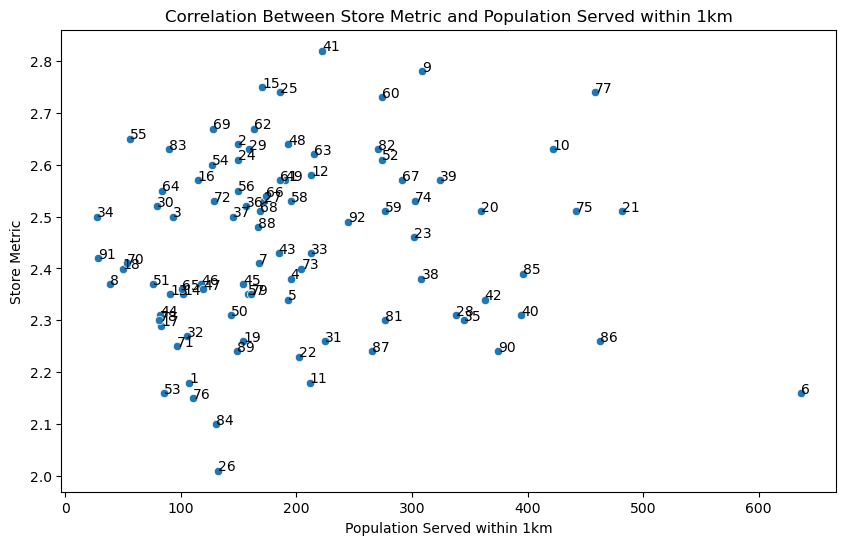

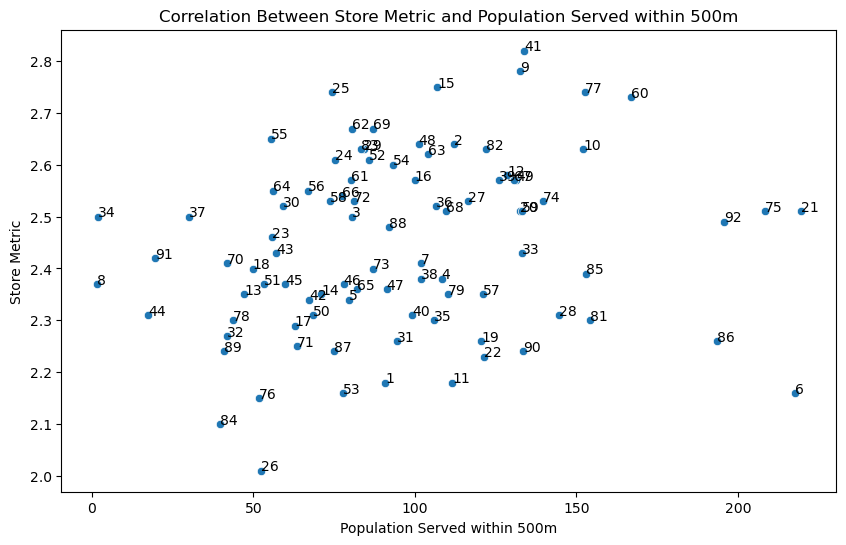

In [16]:
# Scatter plot for Population Served within 1km
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population Served within 1km', y='Metric Store', data=stores_df)
for i in range(stores_df.shape[0]):
    if np.isfinite(stores_df['Population Served within 1km'][i]) and np.isfinite(stores_df['Metric Store'][i]):
        plt.text(stores_df['Population Served within 1km'][i], stores_df['Metric Store'][i], stores_df['Store Id'][i])
plt.xlabel('Population Served within 1km')
plt.ylabel('Store Metric')
plt.title('Correlation Between Store Metric and Population Served within 1km')
plt.show()

# Scatter plot for Population Served within 500m
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population Served within 500m', y='Metric Store', data=stores_df)
for i in range(stores_df.shape[0]):
    if np.isfinite(stores_df['Population Served within 500m'][i]) and np.isfinite(stores_df['Metric Store'][i]):
        plt.text(stores_df['Population Served within 500m'][i], stores_df['Metric Store'][i], stores_df['Store Id'][i])
plt.xlabel('Population Served within 500m')
plt.ylabel('Store Metric')
plt.title('Correlation Between Store Metric and Population Served within 500m')
plt.show()


**Outliers**: it is worth to check outliers that skew our results. For example, the store 6 with an exceptionally high population served but a low Store metric could indicate other influencing factors.

# Recommendations:

- **Store Placement**: Focus on placing stores in densely populated areas to maximize performance.
- **Further Analysis**: Investigate other factors that might influence store performance, such as competition (proximity to ATB, Varus, Novus & other supermarkets), store size, and how old the renovation is.
- **Threshold Review**: Continuously review and adjust the distance threshold based on real customer behavior and store performance data.

By understanding the relationship between store performance and the population served, we can make more informed decisions about store locations.

# Visualizing Population Data on an Interactive Map

In [20]:
# Create a map centered around Kyiv
kyiv_map = folium.Map(location=[50.4501, 30.5234], zoom_start=12)

# Add building points to the map with circle size based on Metric population and color based on distance to nearest store
for idx, row in population_df.iterrows():
    # Determine the color based on the distance to the nearest store
    color = 'blue' if row['Distance to Nearest Store (km)'] <= 0.5 else 'grey'
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Metric population'] * 2,  # Adjust the multiplier as necessary to scale circle sizes
        color=None,  # No border color
        weight=0,  # No border weight
        fill=True,
        fill_color=color,
        fill_opacity=0.6  # Set fill_opacity to 0.6 for 60% opacity
    ).add_to(kyiv_map)

# Add store points to the map with labels
for idx, row in stores_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(f"Store ID: {row['Store Id']}", parse_html=True),
#         icon=folium.Icon(color='blue', icon='shopping-cart', prefix='fa') #this is an alternative version to present a store on the map
        icon=folium.DivIcon(
            html=f"""
                <div style="position: relative; width: 20px; height: 30px; margin-top: -30px;">
                    <div style="background-color: darkblue; color: white; text-align: center; border-radius: 10px 10px 0 0; width: 20px; height: 20px; line-height: 20px; box-shadow: 0 0 3px rgba(0,0,0,0.3); position: absolute; top: 0; left: 50%; transform: translateX(-50%);">
                        {row['Store Id']}
                    </div>
                    <div style="position: absolute; bottom: 0; left: 50%; transform: translateX(-50%); width: 0; height: 0; border-left: 10px solid transparent; border-right: 10px solid transparent; border-top: 10px solid darkblue;"></div>
                </div>
            """
        )
    ).add_to(kyiv_map)

# Save the map to the specified folder
map_output_path = 'C:/Users/Serhiy/Documents/Python Scripts/kyiv-store-population-analysis/results/kyiv_population_map_500_meters.html'
kyiv_map.save(map_output_path)

# Display the map
kyiv_map